# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation.

- Check for missing values and report the number and percentage of missing data for each column.

- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality.

- Generate bar plots for at least three categorical columns and discuss the frequency distributions.

- Identify outliers in at least one numerical column using boxplots.

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target.

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week.

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots.

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation.

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [56]:
import pandas as pd

In [57]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values="?", skipinitialspace=True)
data.sample(10)

age     workclass  fnlwgt     education  education-num  \
18272   80       Private   86111     Doctorate             16   
8070    19       Private  271521       HS-grad              9   
22924   39  Self-emp-inc  188069     Assoc-voc             11   
13898   42   Federal-gov   91468       HS-grad              9   
6496    20       Private  260199       HS-grad              9   
30205   38       Private  187870   Prof-school             15   
10204   30       Private  198183     Assoc-voc             11   
15743   19           NaN  131982  Some-college             10   
9287    42       Private  179524     Bachelors             13   
28722   36       Private  605502          10th              6   

           marital-status        occupation    relationship  \
18272  Married-civ-spouse    Prof-specialty         Husband   
8070        Never-married     Other-service  Other-relative   
22924  Married-civ-spouse   Exec-managerial         Husband   
13898            Divorced      Adm-clerical   Not-in-family   
6496        Never-married      Adm-clerical       Own-child   
30205  Married-civ-spouse    Prof-specialty         Husband   
10204       Never-married    Prof-specialty   Not-in-family   
15743       Never-married               NaN       Own-child   
9287            Separated     Other-service   Not-in-family   
28722       Never-married  Transport-moving   Not-in-family   

                     race     sex  capital-gain  capital-loss  hours-per-week  \
18272               White    Male             0             0              30   
8070   Asian-Pac-Islander    Male             0             0              24   
22924               White    Male             0             0              60   
13898               White  Female             0             0              40   
6496                White  Female             0             0              10   
30205               White    Male             0          2415              90   
10204               White  Female             0             0              40   
15743               White    Male             0             0              40   
9287                White  Female             0             0              50   
28722               Black  Female             0             0              40   

      native-country income  
18272  United-States  <=50K  
8070   United-States  <=50K  
22924  United-States   >50K  
13898  United-States  <=50K  
6496   United-States  <=50K  
30205  United-States   >50K  
10204  United-States  <=50K  
15743  United-States  <=50K  
9287   United-States  <=50K  
28722  United-States  <=50K

In [58]:
data_clean = data.dropna(subset=['workclass'])
print(f"Original rows: {len(data)}")
print(f"Rows after cleaning: {len(data_clean)}")
print(f"Number of removed rows: {len(data) - len(data_clean)}")

Original rows: 32561
Rows after cleaning: 30725
Number of removed rows: 1836


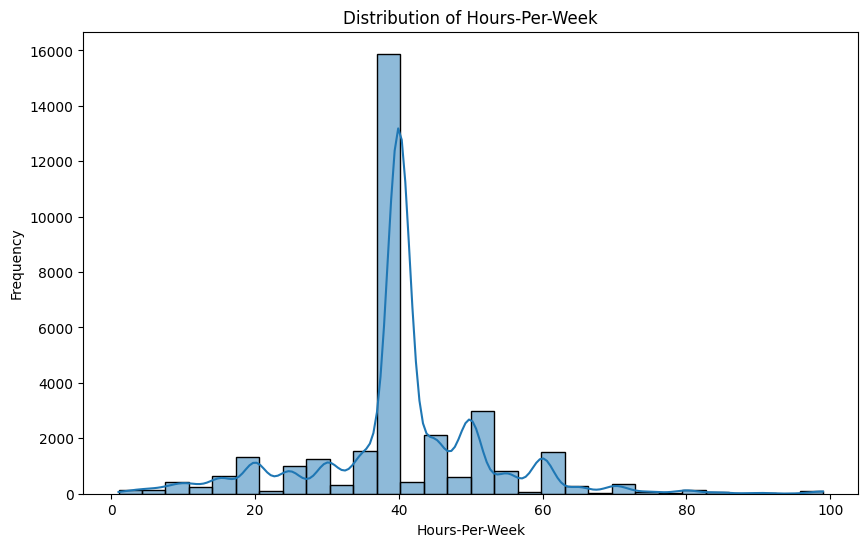

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64


In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data["hours-per-week"], kde=True, bins=30)
plt.title("Distribution of Hours-Per-Week")
plt.xlabel("Hours-Per-Week")
plt.ylabel("Frequency")
plt.show()

print(data["hours-per-week"].describe())

In [60]:
data.replace("?", pd.NA, inplace=True)
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_report = pd.DataFrame({"Missing Values": missing_values, "Percentage (%)": missing_percentage})
print(missing_report)

                Missing Values  Percentage (%)
age                          0        0.000000
workclass                 1836        5.638647
fnlwgt                       0        0.000000
education                    0        0.000000
education-num                0        0.000000
marital-status               0        0.000000
occupation                1843        5.660146
relationship                 0        0.000000
race                         0        0.000000
sex                          0        0.000000
capital-gain                 0        0.000000
capital-loss                 0        0.000000
hours-per-week               0        0.000000
native-country             583        1.790486
income                       0        0.000000


In [61]:
print(data.describe(include="all"))

                 age workclass        fnlwgt education  education-num  \
count   32561.000000     30725  3.256100e+04     32561   32561.000000   
unique           NaN         8           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN     22696           NaN     10501            NaN   
mean       38.581647       NaN  1.897784e+05       NaN      10.080679   
std        13.640433       NaN  1.055500e+05       NaN       2.572720   
min        17.000000       NaN  1.228500e+04       NaN       1.000000   
25%        28.000000       NaN  1.178270e+05       NaN       9.000000   
50%        37.000000       NaN  1.783560e+05       NaN      10.000000   
75%        48.000000       NaN  2.370510e+05       NaN      12.000000   
max        90.000000       NaN  1.484705e+06       NaN      16.000000   

            marital-status      occupation relationship   race    sex  \
count                32561           30718        

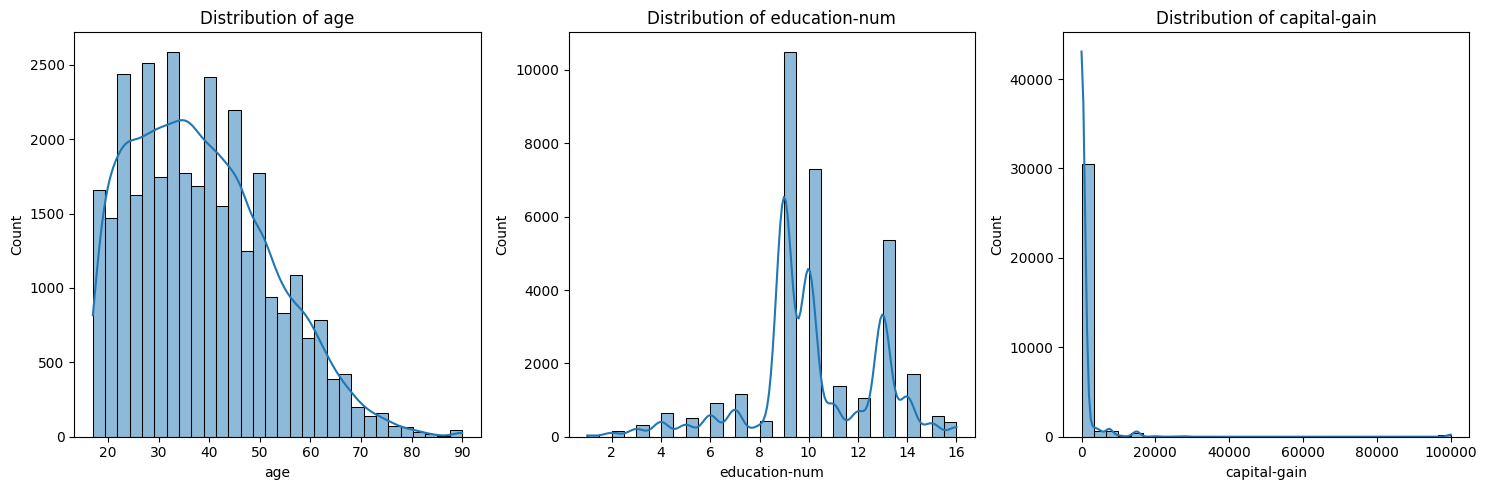

In [62]:
numerical_columns = ["age", "education-num", "capital-gain"]
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

Distribuțiile dezvăluie modele cheie în setul de date. Vârsta are o distribuție asimetrică spre dreapta, majoritatea indivizilor având între 20 și 50 de ani, ceea ce indică o populație predominant activă profesional. Educația este multimodală, cu vârfuri în jurul valorilor 9, 10 și 13, reflectând probabil niveluri educaționale comune, precum liceul și studiile universitare. Câștigul de capital este puternic asimetric spre dreapta, majoritatea indivizilor având câștiguri de capital reduse sau inexistente, în timp ce o mică parte raportează valori semnificativ mari, sugerând o disparitate a veniturilor. Aceste modele oferă o perspectivă asupra caracteristicilor demografice și financiare ale setului de date.









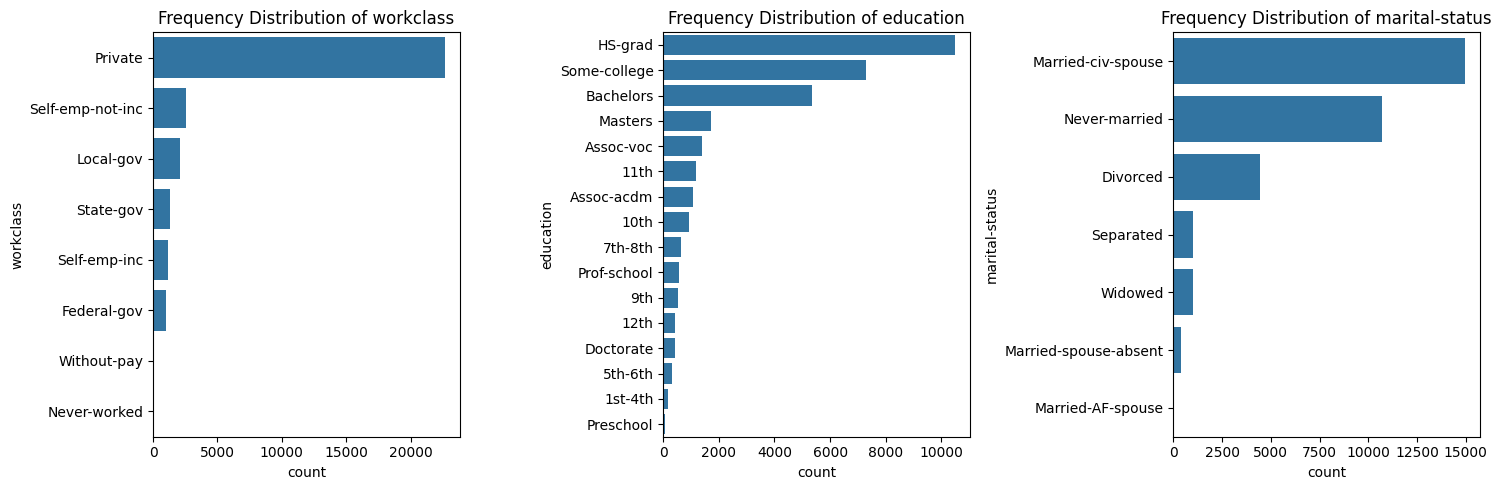

In [63]:
categorical_columns = ["workclass", "education", "marital-status"]
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f"Frequency Distribution of {col}")
plt.tight_layout()
plt.show()

Graficele prezintă distribuția frecvenței pentru trei categorii: clasa de muncă, educația și starea civilă. Majoritatea persoanelor lucrează în sectorul privat, urmate de cei angajați pe cont propriu, dar neîncorporați, și de cei care lucrează pentru guvernul local. Cea mai mare parte a populației are ca nivel de educație absolvent de liceu, urmată de cei care au urmat câteva cursuri universitare și cei cu diplomă de licență. Majoritatea persoanelor sunt căsătorite cu soț/soție civilă, urmate de cei care nu au fost niciodată căsătoriți și de cei divorțați. Aceste informații oferă o perspectivă asupra structurii demografice și socio-economice a populației studiate.

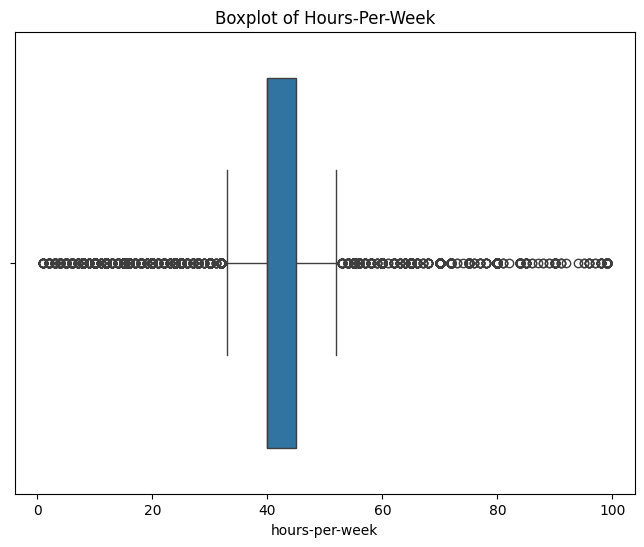

In [64]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data["hours-per-week"])
plt.title("Boxplot of Hours-Per-Week")
plt.show()

Boxplot-ul arată distribuția numărului de ore lucrate pe săptămână, evidențiind valorile extreme și tendințele generale. Majoritatea valorilor sunt concentrate în jurul medianei, care pare să fie în jurul a 40 de ore pe săptămână, ceea ce este standard pentru un program de muncă obișnuit. Mustățile arată variabilitatea datelor, iar punctele situate în afara acestora indică outlieri, adică persoane care lucrează semnificativ mai puține sau mai multe ore pe săptămână, unele chiar aproape de 0 sau 100. Acest lucru sugerează existența unor categorii distincte de muncitori, cum ar fi cei part-time și cei care lucrează un număr excesiv de ore.

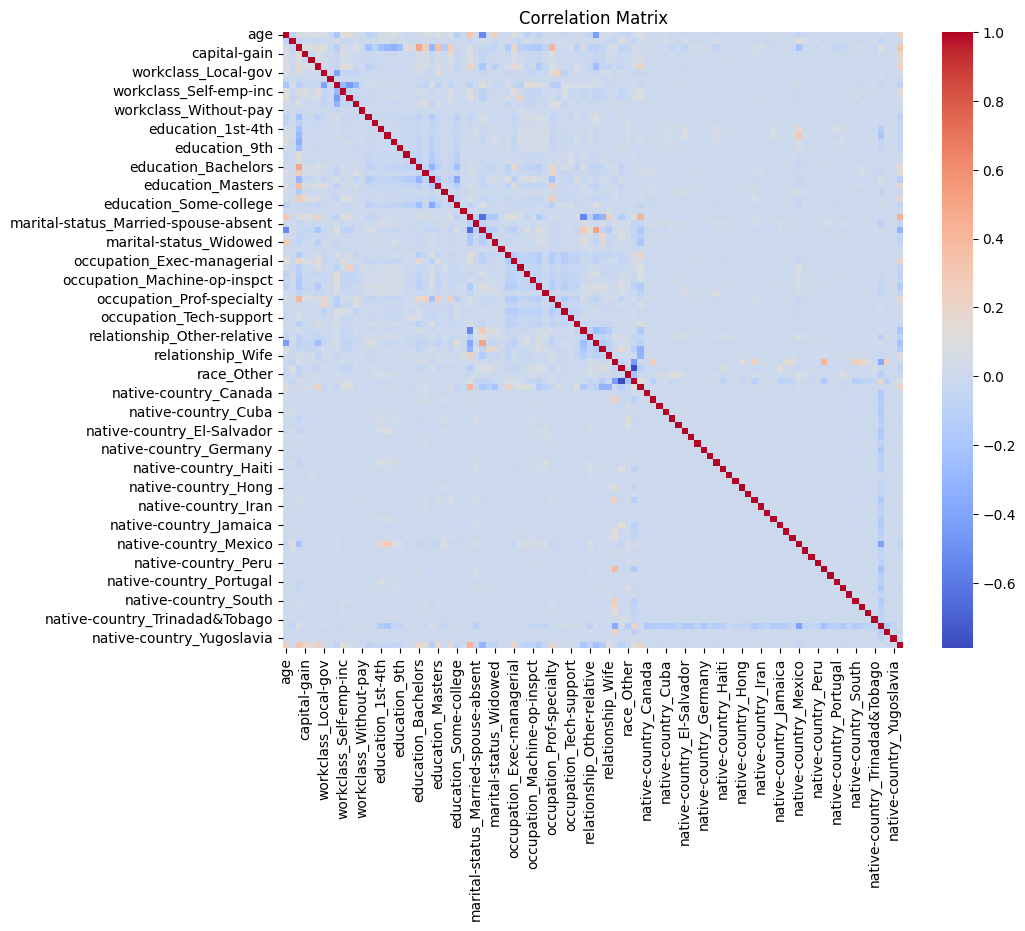

hours-per-week                       1.000000
income_>50K                          0.229689
sex_Male                             0.229309
marital-status_Married-civ-spouse    0.212817
education-num                        0.148123
                                       ...   
education_11th                      -0.102038
marital-status_Widowed              -0.107122
occupation_Other-service            -0.155872
marital-status_Never-married        -0.197936
relationship_Own-child              -0.249254
Name: hours-per-week, Length: 98, dtype: float64


In [65]:
data_encoded = pd.get_dummies(data, drop_first=True)

correlation_matrix = data_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

print(correlation_matrix["hours-per-week"].sort_values(ascending=False))

Această matrice de corelație arată relațiile dintre variabile socio-economice și demografice. Fiecare celulă din matrice reprezintă un coeficient de corelație, indicând cât de puternic și în ce direcție sunt corelate variabilele. Valorile pozitive sugerează o corelație pozitivă, în timp ce valorile negative indică o corelație negativă. De exemplu, variabilele "capital_gain" și "education_bachelors" par să aibă o corelație pozitivă, ceea ce sugerează că persoanele cu un nivel de educație mai ridicat tind să aibă venituri mai mari. Matricea este utilă pentru identificarea relațiilor semnificative care pot ghida analizele socio-economice ulterioare.

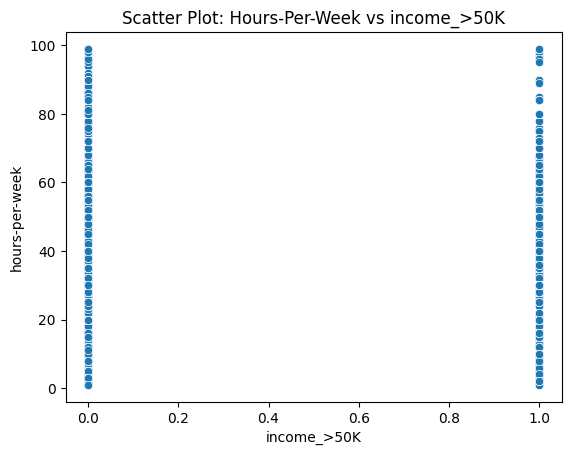

In [66]:
most_correlated = correlation_matrix["hours-per-week"].drop("hours-per-week").idxmax()
sns.scatterplot(x=data_encoded[most_correlated], y=data["hours-per-week"])
plt.title(f"Scatter Plot: Hours-Per-Week vs {most_correlated}")
plt.show()

Acest scatter plot ilustrează relația dintre orele lucrate pe săptămână și venitul mai mare de 50.000 de dolari. Pe axa x este reprezentată variabila "income_>50K", care are valori de 0 și 1, indicând dacă venitul este sub sau peste 50.000 de dolari. Pe axa y este reprezentată variabila "hours-per-week", care indică numărul de ore lucrate pe săptămână, variind de la 0 la 100. Graficul arată că există o distribuție verticală a punctelor, ceea ce sugerează că numărul de ore lucrate pe săptămână nu variază semnificativ în funcție de venitul de peste 50.000 de dolari. Aceasta poate indica faptul că orele lucrate pe săptămână nu sunt un predictor puternic al veniturilor mai mari de 50.000 de dolari.



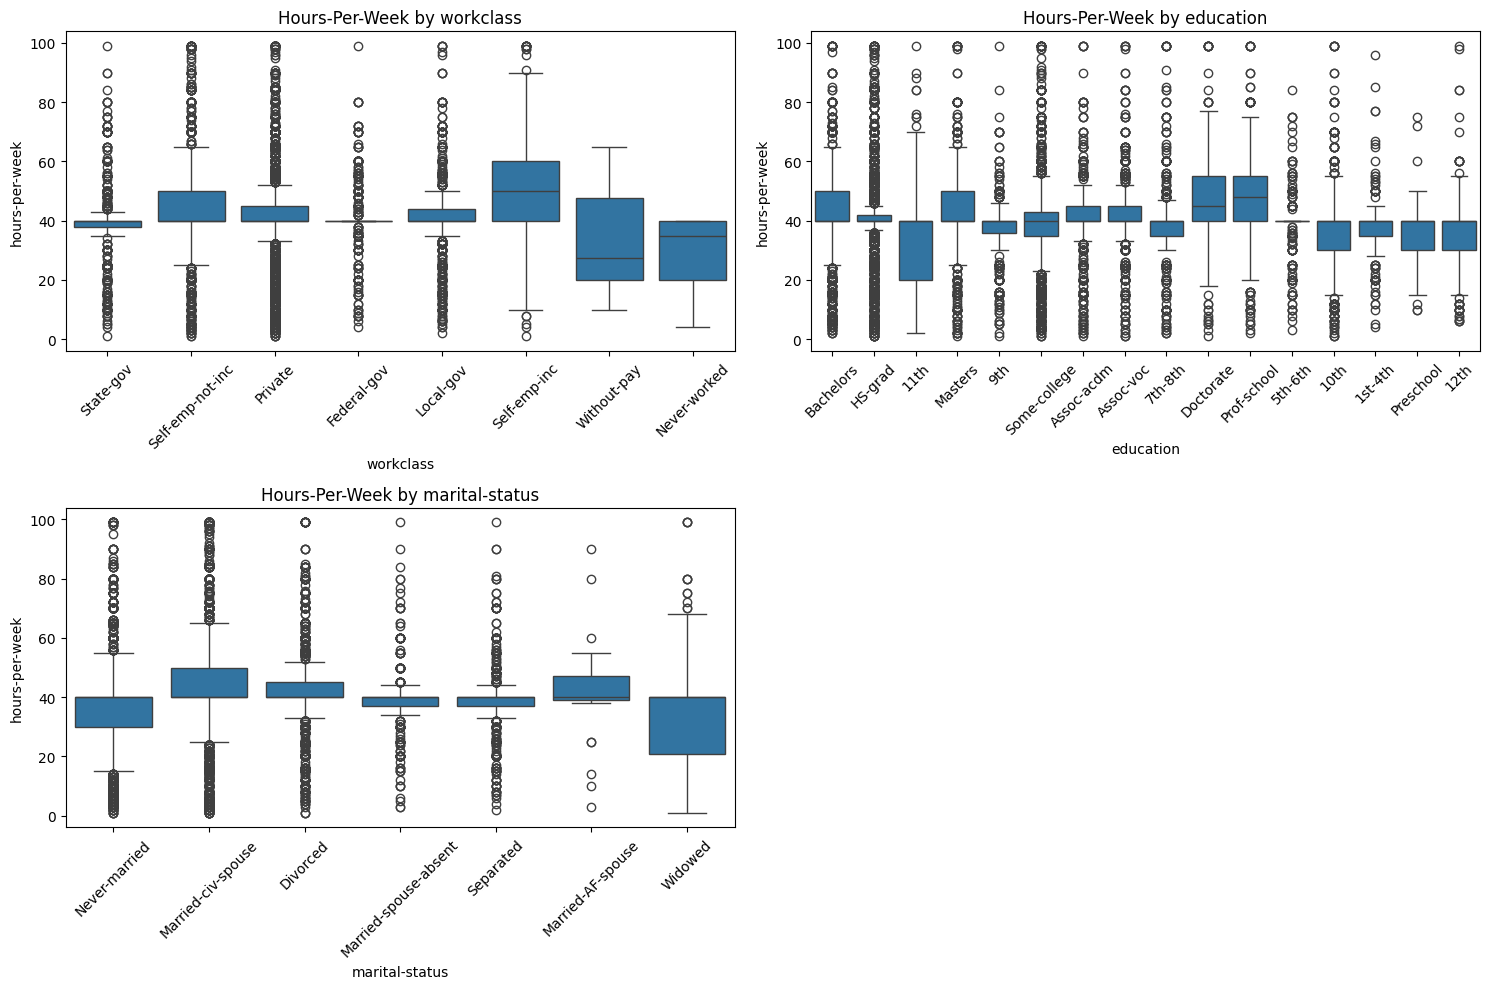

In [67]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[col], y=data["hours-per-week"])
    plt.title(f"Hours-Per-Week by {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Graficele prezintă trei diagrame box-plot care ilustrează distribuția orelor lucrate pe săptămână în funcție de trei variabile diferite: clasa de muncă (workclass), nivelul de educație (education) și statutul marital (marital-status). În prima diagramă, "Hours-Per-Week by workclass", se observă că persoanele care lucrează în sectorul "Self-emp-inc" au o medie mai mare a orelor lucrate pe săptămână comparativ cu celelalte clase de muncă, în timp ce cei din categoria "Without-Pay" și "Never-worked" au cele mai puține ore lucrate. În a doua diagramă, "Hours-Per-Week by education", se remarcă faptul că persoanele cu un nivel de educație "Doctorate" și "Prof-school" tind să lucreze mai multe ore pe săptămână, în timp ce cei cu educație "Preschool" și "1st-4th" au cele mai puține ore lucrate. În ultima diagramă, "Hours-Per-Week by marital-status", se observă că persoanele "Married-civ-spouse" și "Married-AF-spouse" au o medie mai mare a orelor lucrate pe săptămână, în timp ce cei "Never-married" și "Widowed" au cele mai puține ore lucrate. Aceste diagrame sunt relevante deoarece oferă o perspectivă asupra modului în care diferite caracteristici demografice influențează numărul de ore lucrate pe săptămână.